<a href="https://colab.research.google.com/github/PradeepaRW/House_Price_Prediction__using_ANN/blob/main/House_Price_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load and Process the data

In [214]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [215]:
# Load dataset
df = pd.read_csv("/content/bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [216]:
df.shape # dimensions of the dataframe

(13320, 9)

we have 13320 data with, 9 parameters.

In [217]:
df.columns # features

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [218]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [219]:
df['area_type'].value_counts()

,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


Drop unwanted features

In [220]:
# Drop irrelevant columns
df.drop(columns=['area_type', 'availability', 'society', 'balcony'], inplace=True)

Data cleaning

In [221]:
# Find the features that unavailable in the data
df.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [222]:
# Drop rows with missing values
df.dropna(inplace=True)

In [223]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [224]:
df.shape

(13246, 5)

In [225]:
# Convert 'size' into BHK (number of bedrooms)
df['BHK'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

# Check the range of Bedrooms category
df['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [226]:
# check any mismatches in the features
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [227]:
# Convert 'total_sqft' to numeric (handling ranges)
def convert_sqft_to_num(sqft):
    try:
        return float(sqft)
    except:
        values = sqft.split('-')
        return (float(values[0]) + float(values[1])) / 2 if len(values) == 2 else None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df.dropna(subset=['total_sqft'], inplace=True)  # Drop rows where conversion failed

# Create price_per_sqft feature
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

# Encode categorical feature 'location'
# Convert location names to lowercase and remove leading/trailing spaces
df['location'] = df['location'].str.strip().str.lower()

# Apply Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['location'] = encoder.fit_transform(df['location'])



# Select relevant features
features = ['total_sqft', 'BHK', 'bath', 'location']
X = df[features]
df['price'] = np.log1p(df['price'])  # Apply log transformation to price
y = df['price']

df = pd.get_dummies(df, columns=['location'], drop_first=True)  # One-hot encode location



# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data preprocessed successfully!")

Data preprocessed successfully!


Build the neural network model

Input Layer      : 4 features (total_sqft, BHK, bath, location) <br>
Hidden Layers    : 2 layers with ReLU activation <br>
Output Layer     : 1 neuron (predicting house price) <br>
Loss Function    : Mean Squared Error (MSE) since this is a regression task <br>
Optimizer        : Adam

In [228]:
pip install --upgrade tensorflow

In [229]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer 1
    Dense(16, activation='relu'),  # Hidden layer 2
    Dense(1, activation='linear')  # Output layer (Predicting price)
])


from tensorflow.keras.regularizers import l2
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),  # L2 Regularization
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='linear')
])


# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_76 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [230]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


In [231]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)


Train the neural network

In [232]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])


Epoch 1/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 8.1229 - mae: 2.1594 - val_loss: 0.8924 - val_mae: 0.4024
Epoch 2/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.7246 - mae: 0.3475 - val_loss: 0.5881 - val_mae: 0.3189
Epoch 3/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.5441 - mae: 0.3058 - val_loss: 0.4718 - val_mae: 0.2960
Epoch 4/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.4858 - mae: 0.3089 - val_loss: 0.4142 - val_mae: 0.2953
Epoch 5/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.4040 - mae: 0.2983 - val_loss: 0.3674 - val_mae: 0.2933
Epoch 6/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3648 - mae: 0.2963 - val_loss: 0.3412 - val_mae: 0.2979
Epoch 7/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3316 - mae: 0.2953 - val_loss: 0.3036 - val_mae: 0.2917
Epoch 8/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3078 - mae: 0.2974 - val_loss: 0.2781 - val_mae: 0.2881
Epoch 9/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3m

 evaluate the model

In [236]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Compute performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error (MAE): 0.29
Root Mean Squared Error (RMSE): 0.38
R² Score: 0.7090


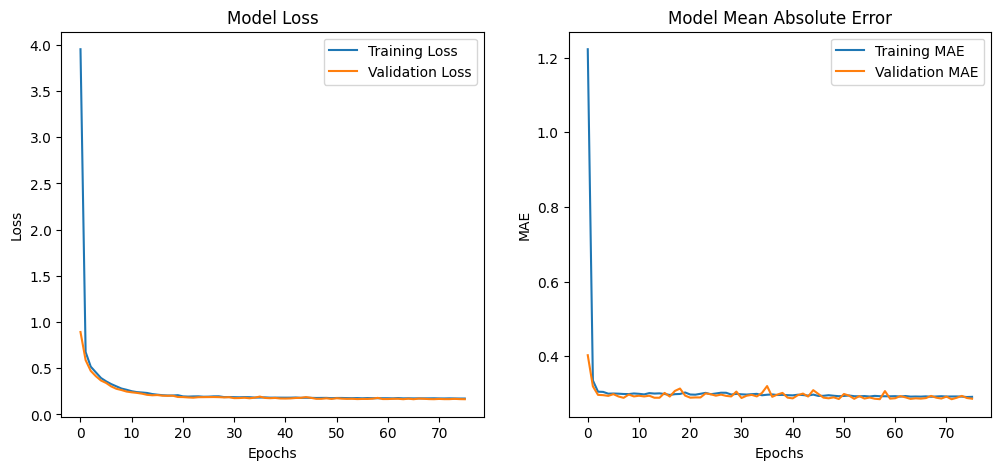

In [234]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    #  Loss Plot
    ax[0].plot(history.history['loss'], label='Training Loss')
    ax[0].plot(history.history['val_loss'], label='Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Model Loss')
    ax[0].legend()

    #  MAE Plot
    ax[1].plot(history.history['mae'], label='Training MAE')
    ax[1].plot(history.history['val_mae'], label='Validation MAE')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('MAE')
    ax[1].set_title('Model Mean Absolute Error')
    ax[1].legend()

    plt.show()

# Call the function to plot
plot_training_history(history)


In [235]:
model.summary()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_76 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,837 (34.52 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,892 (23.02 KB)